# Imports

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pickle

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
train = pd.read_csv('train.csv')

In [3]:
import seaborn as sns
from matplotlib import pyplot as plt

# Functions

In [4]:
def understanding(df):
    print(df.info())
    print(df.describe())
    for col in df.columns:
        if df[col].dtype == 'int64' or df[col].dtype == 'float64':
            plt.hist(df[col])
            plt.title(col)
            plt.show()
            plt.clf()
        elif df[col].dtype == 'object':
            sns.barplot(df[col].value_counts().index,df[col].value_counts()).set_title(col)
            plt.show()
            
def heat(df):
    num_columns = []
    for col in df.columns:
        if df[col].dtype == 'int64' or df[col].dtype == 'float64':
            num_columns.append(col)
    sns.heatmap(df[num_columns].corr(), annot=True)

# EDA

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
train.Age.max()

79.0

In [7]:
#understanding(train)

## HomePlanet

In [8]:
print(train.HomePlanet.value_counts())
print(train.HomePlanet.unique())

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64
['Europa' 'Earth' 'Mars' nan]


In [9]:

train = train.fillna(value={'HomePlanet': 'Earth'})
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


## CryoSleep

In [10]:
train.CryoSleep.value_counts()
train.CryoSleep.fillna(False)
print(train.CryoSleep.value_counts())
train.CryoSleep = train.CryoSleep.apply(lambda x: 0 if x == False else 1)
print(train.CryoSleep.value_counts())

train.info()

False    5439
True     3037
Name: CryoSleep, dtype: int64
0    5439
1    3254
Name: CryoSleep, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   int64  
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), int64(1), object(6)
memory usage: 891.5+ KB


In [11]:
print(train.Cabin.value_counts())

train['CabinDeck'] = train.Cabin.astype(str).str[0]
train = train.fillna(value={'Cabin': 'F'})


print(train.CabinDeck.value_counts())

G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: Cabin, Length: 6560, dtype: int64
F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
n     199
T       5
Name: CabinDeck, dtype: int64


In [12]:
train['CabinSide'] = train.Cabin.astype(str).str[-1]
train['CabinSideStarboard'] = train.CabinSide.apply(lambda x: 1 if x == 'S' else 0)


print(train.CabinSide.value_counts())
print(train.CabinSideStarboard.value_counts())

S    4288
P    4206
F     199
Name: CabinSide, dtype: int64
0    4405
1    4288
Name: CabinSideStarboard, dtype: int64


In [13]:
print(train.Destination.value_counts())
train.Destination.fillna('TRAPPIST-1e', inplace=True)


print(train.Destination.value_counts())

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64
TRAPPIST-1e      6097
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64


In [14]:
print(train.Age.value_counts())
median = round((train.Age.median()), 2)
print(median)

train.Age.fillna(median, inplace=True)

24.0    324
18.0    320
21.0    311
19.0    293
23.0    292
       ... 
72.0      4
78.0      3
79.0      3
76.0      2
77.0      2
Name: Age, Length: 80, dtype: int64
27.0


In [15]:
max(train.Age)

79.0

In [16]:
print(train.VIP.value_counts())

train.VIP.fillna(False, inplace=True)
train.VIP = train.VIP.apply(lambda x: 0 if x == False else 1)


print(train.VIP.value_counts())

False    8291
True      199
Name: VIP, dtype: int64
0    8494
1     199
Name: VIP, dtype: int64


In [17]:
print(train.RoomService.value_counts())
train.RoomService.fillna(0.0, inplace=True)
train.RoomService = train.RoomService.apply(lambda x: 0 if x == 0.0 else 1)


print(train.RoomService.value_counts())

0.0       5577
1.0        117
2.0         79
3.0         61
4.0         47
          ... 
1612.0       1
2598.0       1
632.0        1
378.0        1
745.0        1
Name: RoomService, Length: 1273, dtype: int64
0    5758
1    2935
Name: RoomService, dtype: int64


In [18]:
print(train.FoodCourt.value_counts())
train.FoodCourt.fillna(0.0, inplace=True)
train.FoodCourt = train.FoodCourt.apply(lambda x: 0 if x == 0.0 else 1)

print(train.FoodCourt.value_counts())

0.0       5456
1.0        116
2.0         75
3.0         53
4.0         53
          ... 
3846.0       1
5193.0       1
312.0        1
827.0        1
4688.0       1
Name: FoodCourt, Length: 1507, dtype: int64
0    5639
1    3054
Name: FoodCourt, dtype: int64


In [19]:
print(train.ShoppingMall.value_counts())
train.ShoppingMall.fillna(0.0, inplace=True)
train.ShoppingMall = train.ShoppingMall.apply(lambda x: 0 if x == 0.0 else 1)


print(train.ShoppingMall.value_counts())

0.0       5587
1.0        153
2.0         80
3.0         59
4.0         45
          ... 
3627.0       1
2074.0       1
871.0        1
742.0        1
1872.0       1
Name: ShoppingMall, Length: 1115, dtype: int64
0    5795
1    2898
Name: ShoppingMall, dtype: int64


In [20]:
print(train.Spa.value_counts())
train.Spa.fillna(0.0, inplace=True)
train.Spa = train.Spa.apply(lambda x: 0 if x == 0.0 else 1)


print(train.Spa.value_counts())

0.0       5324
1.0        146
2.0        105
5.0         53
3.0         53
          ... 
273.0        1
2581.0       1
2948.0       1
3778.0       1
1643.0       1
Name: Spa, Length: 1327, dtype: int64
0    5507
1    3186
Name: Spa, dtype: int64


In [21]:
print(train.VRDeck.value_counts())

train.VRDeck.fillna(0.0, inplace=True)
train.VRDeck = train.VRDeck.apply(lambda x: 0 if x == 0.0 else 1)


print(train.VRDeck.value_counts())

0.0       5495
1.0        139
2.0         70
3.0         56
5.0         51
          ... 
408.0        1
876.0        1
2891.0       1
2102.0       1
3235.0       1
Name: VRDeck, Length: 1306, dtype: int64
0    5683
1    3010
Name: VRDeck, dtype: int64


In [22]:
import numpy as np

#print(train.Name.value_counts())
#
#train.drop_duplicates(subset=['Name'], inplace=True)
#train['LastName'] = train.Name.apply(lambda x: x.split()[-1] if x else 'None')
#lst = train.LastName.tolist()
#family = []
#for x in lst:
#    if lst.count(x) > 1:
#        family.append(x)
#train['Family'] = train.LastName.apply(lambda x: 1 if x in family else 0)
#
#test.drop_duplicates(subset=['Name'], inplace=True)
#test['LastName'] = test.Name.apply(lambda x: x.split()[-1] if x else 'None')
#lst = test.LastName.tolist()
#family = []
#for x in lst:
#    if lst.count(x) > 1:
#        family.append(x)
#test['Family'] = test.LastName.apply(lambda x: 1 if x in family else 0)
#
#print(train.Family.value_counts())



In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PassengerId         8693 non-null   object 
 1   HomePlanet          8693 non-null   object 
 2   CryoSleep           8693 non-null   int64  
 3   Cabin               8693 non-null   object 
 4   Destination         8693 non-null   object 
 5   Age                 8693 non-null   float64
 6   VIP                 8693 non-null   int64  
 7   RoomService         8693 non-null   int64  
 8   FoodCourt           8693 non-null   int64  
 9   ShoppingMall        8693 non-null   int64  
 10  Spa                 8693 non-null   int64  
 11  VRDeck              8693 non-null   int64  
 12  Name                8493 non-null   object 
 13  Transported         8693 non-null   bool   
 14  CabinDeck           8693 non-null   object 
 15  CabinSide           8693 non-null   object 
 16  CabinS

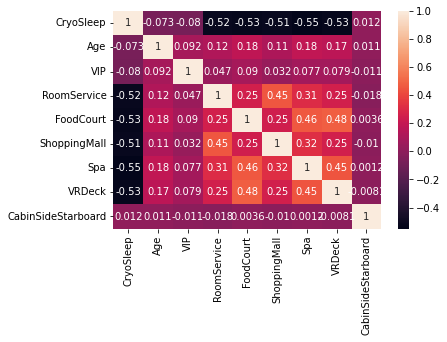

In [24]:
heat(train)

# Train Test Split

In [25]:
columns_to_drop = ['PassengerId', 'Cabin', 'CabinSide', 'Name', 'RoomService', 'ShoppingMall', 'Spa', 'VRDeck']

X = train.drop(columns_to_drop, axis=1)
y = train.Transported
X = X.drop('Transported', axis=1)

In [26]:
from sklearn.preprocessing import LabelEncoder

le_planet = LabelEncoder()

X.HomePlanet = le_planet.fit_transform(X.HomePlanet)

In [27]:
le_destination = LabelEncoder()

X.Destination = le_destination.fit_transform(X.Destination)

In [28]:
le_cabin = LabelEncoder()

X.CabinDeck = le_cabin.fit_transform(X.CabinDeck)

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=1)

In [30]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6954 entries, 5776 to 235
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   HomePlanet          6954 non-null   int64  
 1   CryoSleep           6954 non-null   int64  
 2   Destination         6954 non-null   int64  
 3   Age                 6954 non-null   float64
 4   VIP                 6954 non-null   int64  
 5   FoodCourt           6954 non-null   int64  
 6   CabinDeck           6954 non-null   int64  
 7   CabinSideStarboard  6954 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 489.0 KB


# Basic Model Testing

In [31]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

In [32]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='error', random_state=0)
cv = cross_val_score(xgb,X_train,y_train,cv=5)
print(cv.mean())



0.7306598948016282


In [33]:
#from sklearn.model_selection import GridSearchCV
#
#
#params = { 'max_depth': [3,6,10],
#           'learning_rate': [0.01, 0.05, 0.1],
#           'n_estimators': [100, 500, 1000],
#           'colsample_bytree': [0.3, 0.7]}
#xgbr = XGBClassifier(use_label_encoder=False, eval_metric='error', seed = 20)
#clf = GridSearchCV(estimator=xgbr, 
#                    param_grid=params,
#                    scoring='neg_mean_squared_error', 
#                    verbose=1)
#clf.fit(X_train, y_train)
#print("Best parameters:", clf.best_params_)

In [34]:
xgb_final = XGBClassifier(use_label_encoder=False, eval_metric='error', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 6, n_estimators = 100)
xgb_final.fit(X_train, y_train)
cv = cross_val_score(xgb_final, X_train, y_train, cv=5)
print(cv.mean())

pred = xgb_final.predict(X_test).astype(int)


0.736988864695447


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

In [38]:
data = {'model': xgb, "le_planet": le_planet, 'le_destination': le_destination, 'le_cabin': le_cabin}
with open('model.pickle', 'wb') as file:
    pickle.dump(data, file)

In [39]:
pickle.dump(xgb_final, open('model.pickle', 'wb'))

In [40]:
with open('model.pickle', 'rb') as file:
    data = pickle.load(file)



model = data['model']
le_planet = data['le_planet']
le_destination = data['le_destination']
le_cabin = data['le_cabin']

TypeError: 'XGBClassifier' object is not subscriptable

In [ ]:
test = np.array([['Earth', 1, "TRAPPIST-1e", 22, 1, 1, "A", 0]])

test[:, 0] = le_planet.transform(X[:,0])
test[:, 2] = le_destination.transform(X[:,2])
test[:, 6] = le_cabin.transform(X[:,6])
test = test.astype(float)